In [1]:
# Importing Libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Loading Boston house pricing dataset

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [14]:
# checking the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Preparing the dataset

In [24]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# Adding target column
df['Price'] = boston.target

In [26]:
# Summarising the stats of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Checking for missing values
df.isnull().sum()

### Exploratory Data Analysis

In [27]:
## Checkink Pearson's Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# Visualizing correlation
sns.pairplot(df)

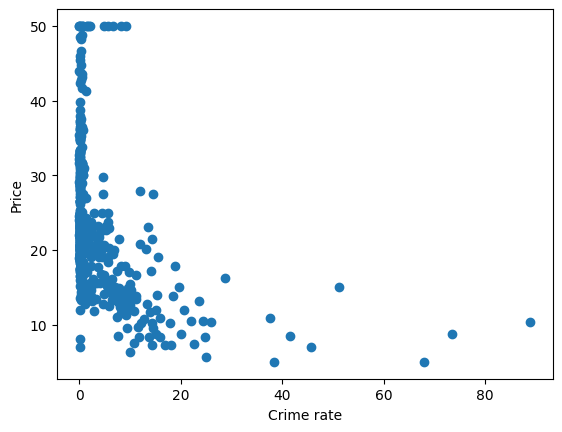

In [28]:
# Taking scatterplot between Crime rate and price
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

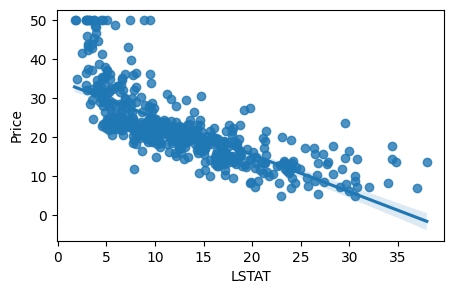

In [32]:
# Plotting regression plots
# sns.regplot(x='RM', y='Price', data=df) RM: Avg no of rooms per dwelling
plt.figure(figsize=(5,3))
sns.regplot(x='LSTAT', y='Price', data=df)


<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

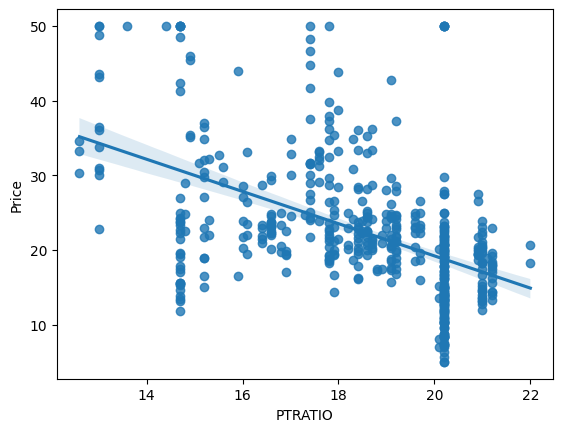

In [33]:
sns.regplot(x='PTRATIO', y='Price', data=df)

In [35]:
# Creating dependent and Independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
# Performing train test split, 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [41]:
X_test.shape

(152, 13)

In [42]:
# Importing standard scaler and Standardizing the df, creating instance scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test= scaler.transform(X_test)

### Model Training

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Printing the coefficients and the intercept
print(lr.coef_)
print(lr.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903956


In [49]:
## On which parameters the model has been trained
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [50]:
## Prediction with test data
y_pred = lr.predict(X_test)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

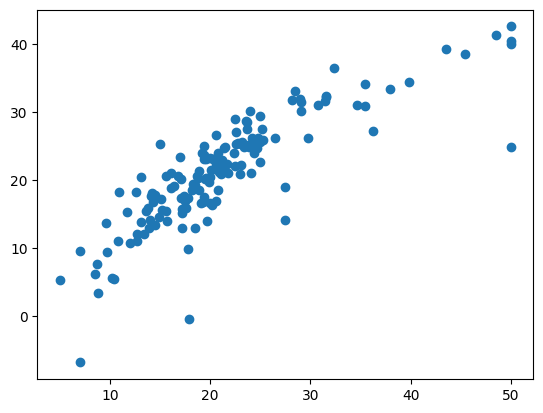

In [51]:
# Validating some assumptions of linear model, hence Visualizing y_test and y_pred through scatter plot
plt.scatter(y_test, y_pred)

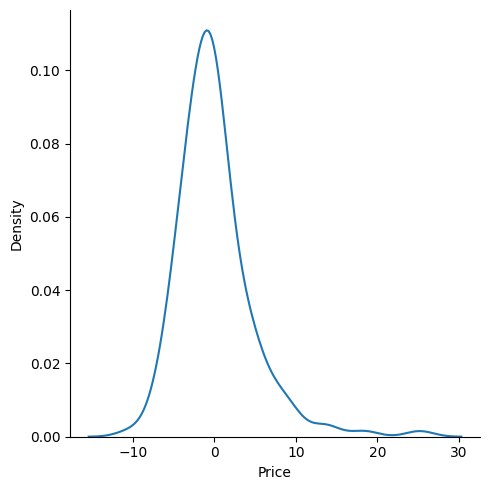

In [54]:
## Prediction with residual (Yi - Yhati(y_pred)) plot, Normality assumption
residuals = y_test - y_pred
sns.displot(residuals, kind='kde')

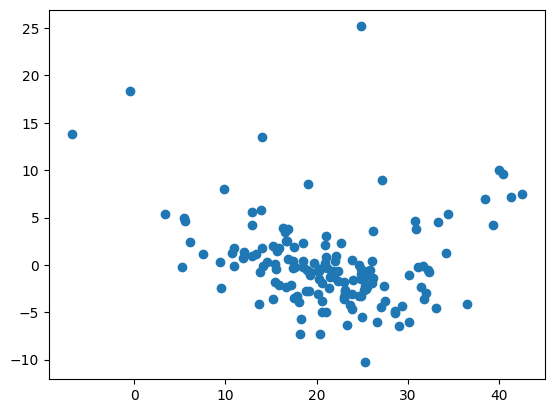

In [55]:
## Error terms are randomly distributed assumption
plt.scatter(y_pred, residuals)

In [57]:
## Computing some metrics - MSE = SSE/n-p, RMSE, MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

21.517444231177205
3.1627098714574053
4.6386899261728205


### R-squared and Adjusted R-squared

In [58]:
# R-squared, How much variance in my target variable will be explained by my independent variable
# R-squared = 1 - SSR/SST
from sklearn.metrics import r2_score
score= r2_score(y_test, y_pred)
print(score)

0.7112260057484933


## Formula

### Adj R2 = 1 - [(1-R2)*(n-1)/(n-p-1)]

In [59]:
# Adjusted R-squared, n=no. of observations, p=no. of parameters, Adj R2 - R2 divided by Degrees of Freedom

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.6840226584639311

### New data Prediction

In [60]:
# Taking the first row of df and making prediction on it
# boston.data[0].shape gives [13,] ie 1-D array, conv to 2-D
# boston.data[0].reshape(1,-1).shape is [13,1]
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [61]:
# Transformation
scaler.transform(boston.data[0].reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [62]:
lr.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])

## Pickle the model file for deployment

In [64]:
import pickle
pickle.dump(lr, open('lrmodel.pkl', 'wb'))

In [66]:
pickled_model = pickle.load(open('lrmodel.pkl','rb'))

In [67]:
# Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])